### Title: SUICIDE RATES IN STUDENTS

TEAM MEMBERS: <br> 1)Akshay pujari<br> 2)Sripurna petkar<br> 3)Darshan lingaraddi <br>  4)N.Abhishek

### INTRODUCTION:


From 2001 to 2012, suicide rates in India presented a growing public health concern, reflecting the complex interplay of socio-economic, cultural, and psychological factors. 
During this period, the overall suicide rate showed an increasing trend, with significant gender disparities and regional variations. 
Southern states like Tamil Nadu and Kerala consistently reported higher rates, and younger age groups, particularly those between 15 and 29, were notably affected. 
The primary drivers of suicide included family issues, economic distress, particularly among farmers, and mental health challenges.


### SDG 3 target

SDG3 is a part of the United Nations Sustainable Development Goals framework which focuses on ensuring healthy lives and promoting well-being for all at all ages


### Problem statement And Objectives

Problem Statement:
Conducting in-depth analysis to explore suicide data,with the goal of uncovering patterns and trends.
Objectives:
To analyze the pattern and visualize the data of the suicide rates in INDIA from 2001-2012.
Analyse patterns in suicides across diverse age/sex.
To build a time series model that can predict the trend of suicide rates for the next 10 years. 


### Problem statement:

To analyze the survey data of the suicides in India between 2001-2012 with different reasons and visualize the data using Exploratory Data Analytics

### Objectives: 

To find the number of people who committed suicide due to different reasons in INDIA from 2001-2012.
To analyze the pattern and visualize the data of the suicide rates in INDIA from 2001-2012

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import warnings

<a id="section-two"></a>
## <b>Reading the dataset:

In [59]:
df = pd.read_csv(r"C:\Users\aksha\OneDrive\Desktop\eda pro\Suicides in India 2001-2012.csv")

### DATASET 

In [60]:
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


### DATA DESCRIPTION

Data Collection:

Source Link:[R] 

 Suicide Rate(2001-2012) (kaggle.com) 

Data description: <br>
 

DATASET  - INDIAN SUICIDES 2001-2012​

​

<br>
SHAPE OF DATASET = (237520,7)

### ATTRIBUTES

1. State: state does the suicide person belongs.
2. Sex:
Sex = 1-male,2-female
3. Year: In which year person attempted suicide
4. Causes: cause for suicide(eg. Divorce, Love failure, poverty etc…)
5. Social status: social status of a person who attempted suicide(eg. Married, unmarried, widow, widower, etc…)
6. Profession: The profession of a person who attempted suicide(eg. Farmer, student, government employee, etc…)
7. Education: Level of education of the person who attempted suicide(eg. Graduate, post-graduate, diploma, etc…)
8. Means adopted: By what means the person attempts suicide(eg. By touching electric wires, jumping from a building, sleeping under vehicles and trains, etc…)
9. Total: count of suicides



Total cases from 2001-12: 
 Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64


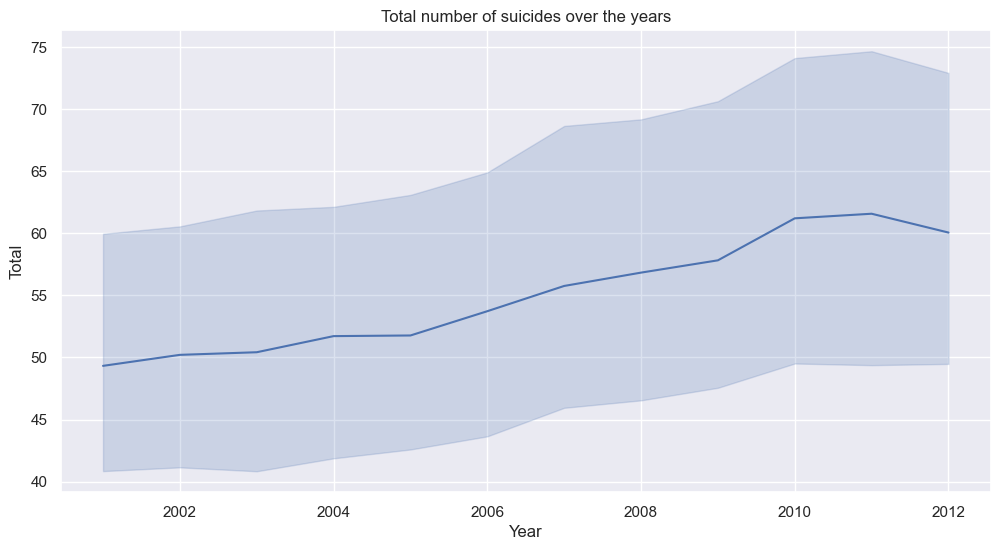

In [61]:
print("Total cases from 2001-12: \n",df.groupby("Year")["Total"].sum())
tot_suicide = df.groupby("Year")["Total"]
plt.figure(figsize=(12,6))
plt.title("Total number of suicides over the years")
sns.lineplot(x='Year',y='Total',data=df)
sns.set(style='dark')
plt.show()

C:\Users\aksha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


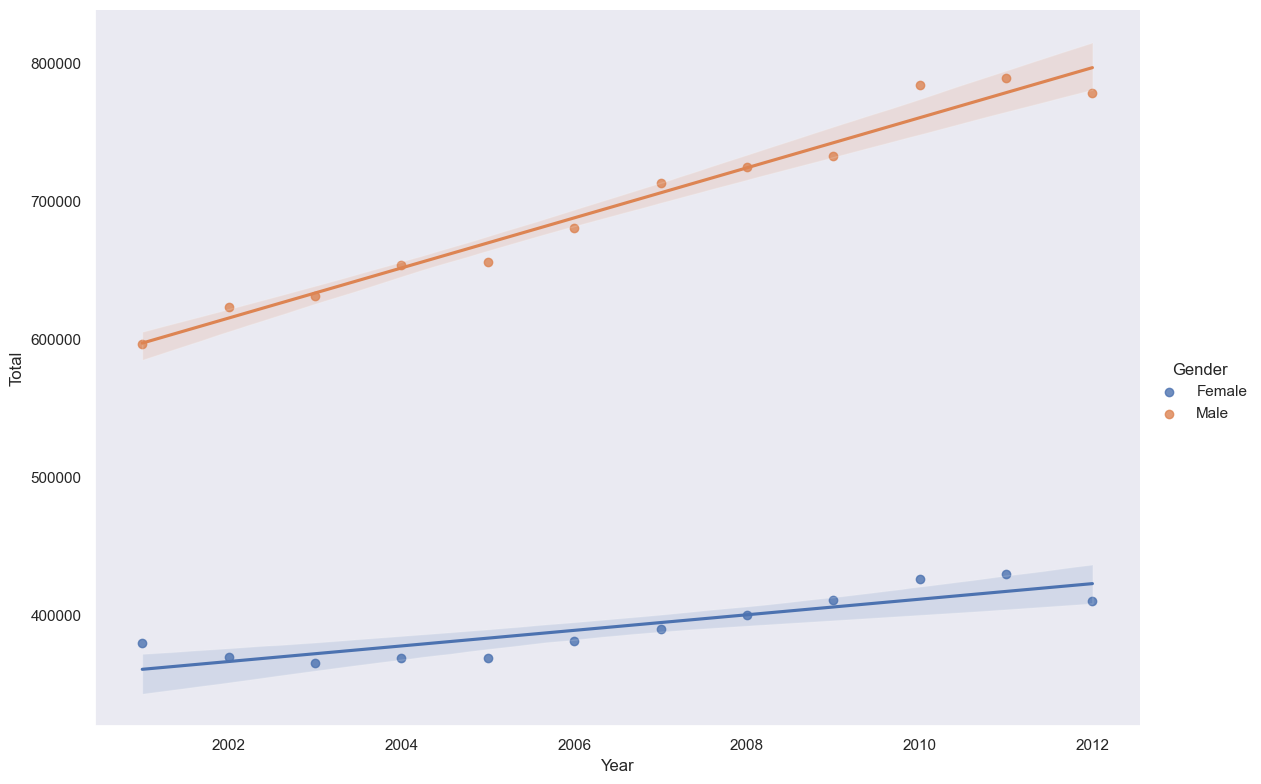

<Figure size 640x480 with 0 Axes>

In [62]:
grp_year = df.groupby(["Year","Gender"])["Total"].sum()
grp_year = pd.DataFrame(grp_year).reset_index()
sns.lmplot(x="Year", y="Total", hue="Gender", data=grp_year,height=8, aspect=11.7/8)
plt.show()


In [63]:
state_gender = (df.groupby(["State","Gender",'Year'])
        .agg(value=pd.NamedAgg(column="Total",aggfunc="sum"))['value']
        .unstack(fill_value=0)
        .rename_axis(None, axis=1)
        .unstack())
state_gender['Total']=state_gender.sum(axis=1, numeric_only=True)
state_gender.style.background_gradient(cmap='Reds')

<a id="section-three"></a>
## <b>Data Pre-processing:

In [64]:
#checking for null values
df.isnull().sum()


State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

There are no null values in the dataset

In [65]:
df.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [66]:
df['State'].value_counts()

State
Madhya Pradesh       6792
Maharashtra          6792
Karnataka            6792
Odisha               6791
Andhra Pradesh       6791
Rajasthan            6791
Bihar                6790
Chhattisgarh         6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (States)        312
Total (Uts)           312
Name: 

In [67]:
df=df[(df['State']!='Total (All India)') & (df['State']!='Total (States)') & (df['State']!='Total (Uts)')]

In [68]:
df_causes = df[df['Type_code']=='Causes']

<a id="section-four"></a>
## <b>Exploratory Data Analysis:

### <b>Total number of people who has committed suicide from 2001-2012:

Total cases from 2001-12: 
 Year
2001    108506
2002    110417
2003    110851
2004    113697
2005    113914
2006    118112
2007    122637
2008    125017
2009    127151
2010    134599
2011    135585
2012    120488
Name: Total, dtype: int64


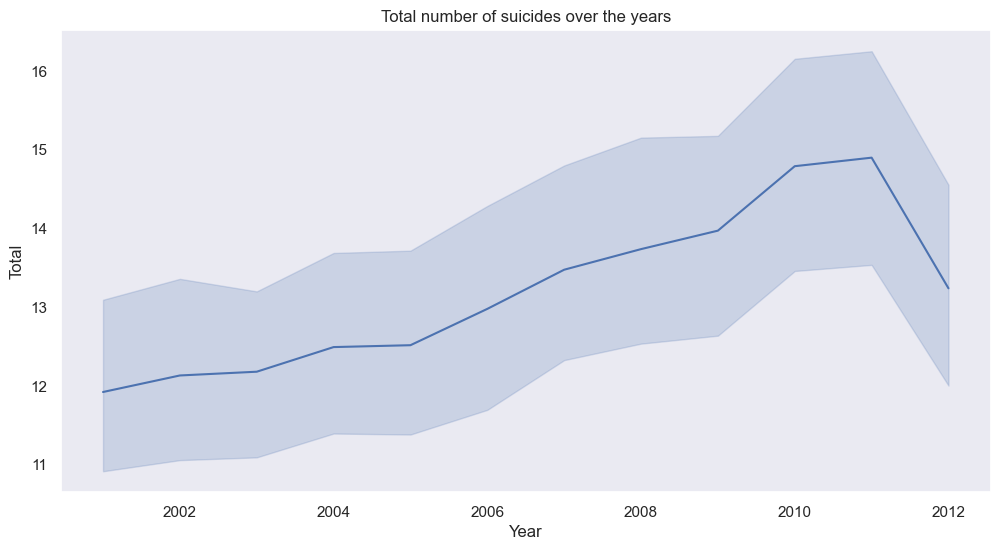

In [69]:
print("Total cases from 2001-12: \n",df_causes.groupby("Year")["Total"].sum())
tot_suicide = df_causes.groupby("Year")["Total"]
plt.figure(figsize=(12,6))
plt.title("Total number of suicides over the years")
sns.lineplot(x='Year',y='Total',data=df_causes)
sns.set(style='dark')
plt.show()

### <b>Suicides across States:

In [70]:
state=df_causes.groupby('State')['Total'].sum().to_frame()

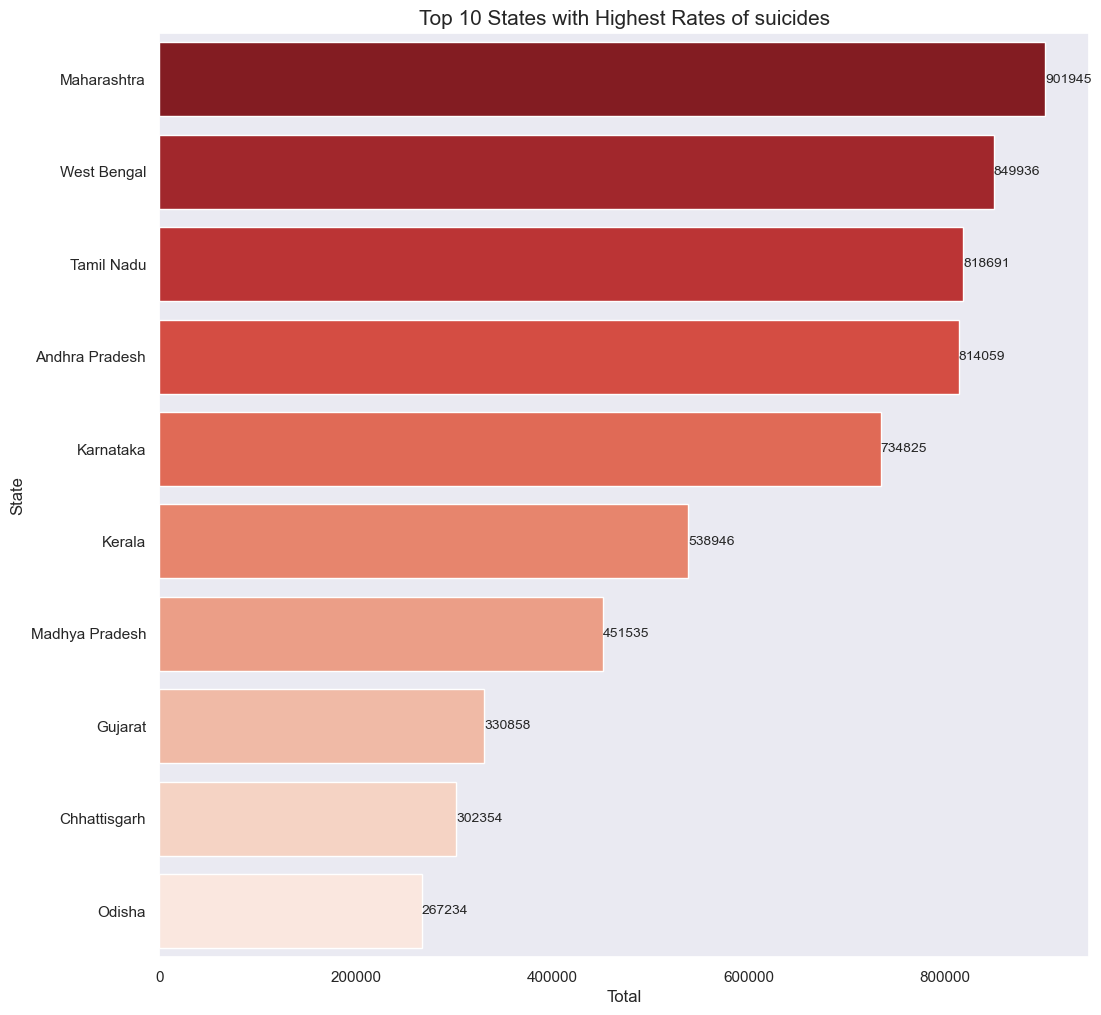

In [71]:
filter_state =df.groupby("State")[["State","Total"]].sum().sort_values('Total',ascending=False).head(10)
plt.figure(figsize=(12,12))
plt.title("Top 10 States with Highest Rates of suicides",fontsize=15)
c1 = sns.barplot(x="Total",y=filter_state.index,data=filter_state,palette="Reds_r")
c1.bar_label(c1.containers[0],size = 10)
plt.show()


### <b>Gender which tends to commit more Suicides:

C:\Users\aksha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


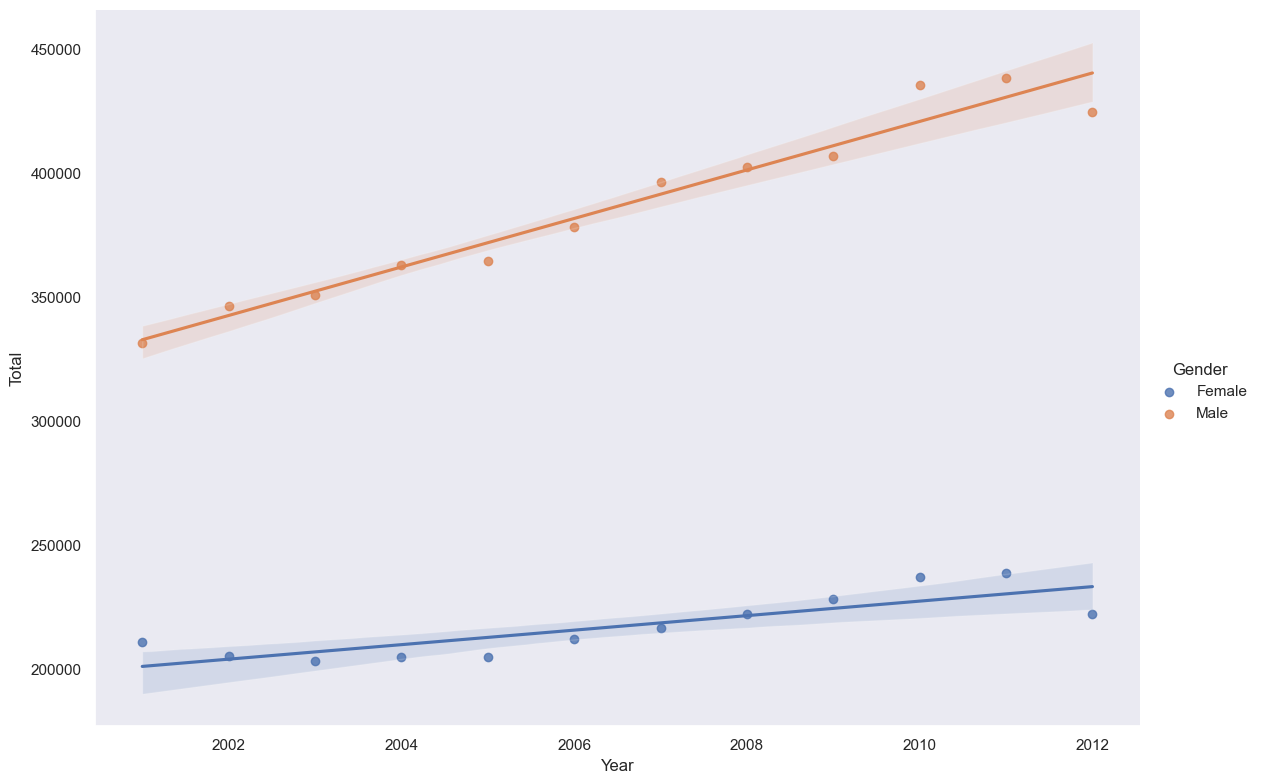

In [72]:
grp_year = df.groupby(["Year","Gender"])["Total"].sum()
grp_year = pd.DataFrame(grp_year).reset_index()
sns.lmplot(x="Year", y="Total", hue="Gender", data=grp_year,height=8, aspect=11.7/8)
plt.show()


<b>Inference:</b>
- There is **higher positive slop** for Males when compared to females 
- Indicating that more men would likely resort to suicide in future.

### <b>Comparison of the suicide of the Genders over the years:

In [73]:
year=df_causes.groupby('Year')['Total'].sum().to_frame()

women=df_causes[df_causes['Gender']=='Female']
women_year=women.groupby('Year')['Total'].sum().to_frame()
women_year.rename(columns={'Total': 'Female'}, inplace=True)

men=df_causes[df_causes['Gender']=='Male']
men_year=men.groupby('Year')['Total'].sum().to_frame()
men_year.rename(columns={'Total': 'Male'}, inplace=True)
gender_year=men_year.join(women_year)
gender_year

,Male,Female
Year,,
2001,66314,42192
2002,69332,41085
2003,70221,40630
2004,72651,41046
2005,72916,40998
2006,75702,42410
2007,79295,43342
2008,80544,44473
2009,81471,45680


### <b>Gender-wise suicide in States:

In [74]:
state_gender = (df_causes.groupby(["State","Gender",'Year'])
        .agg(value=pd.NamedAgg(column="Total",aggfunc="sum"))['value']
        .unstack(fill_value=0)
        .rename_axis(None, axis=1)
        .unstack())
state_gender['Total']=state_gender.sum(axis=1, numeric_only=True)
state_gender.style.background_gradient(cmap='Reds')

### <b>Cause of Suicides:

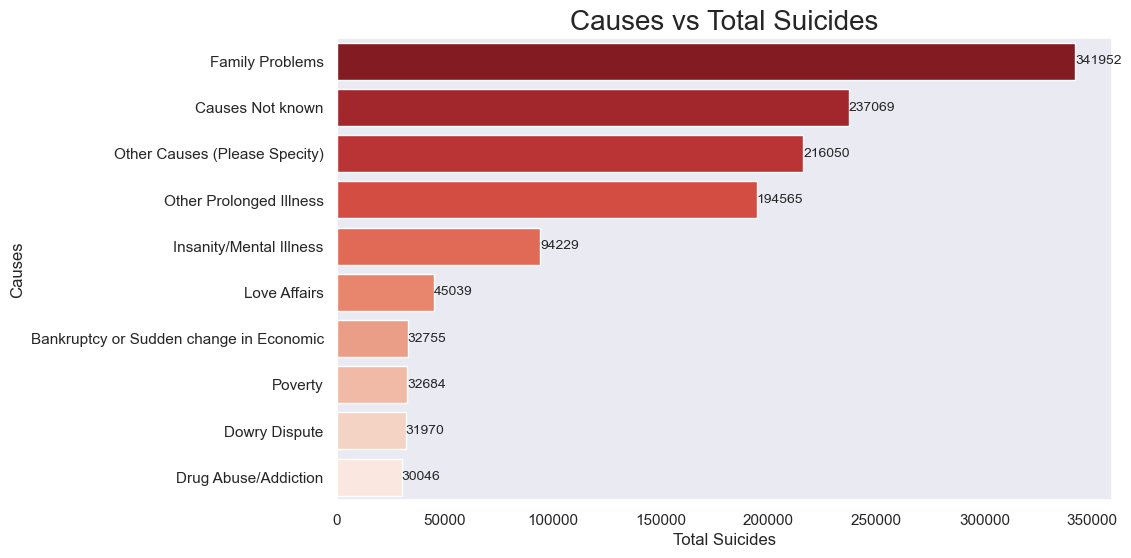

In [75]:
plt.figure(figsize=(10,6))
temp = df_causes[['Type','Total']].groupby(['Type']).sum().sort_values('Total',ascending=False).head(10)
c1 = sns.barplot(y=temp.index,x=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size = 10)
plt.title('Causes vs Total Suicides',fontsize=20)
plt.xlabel('Total Suicides')
plt.ylabel('Causes')
plt.show()


<b>Inference:</b>
- **Family Problems** seems to be the leading cause of suicides among people
- While **Illness** also contributed to high rates of suicides*.

### <b>Family Problems:</b>

In [76]:
df_causes_fp = df_causes[df_causes.Type=='Family Problems']


##### **Gender wise Suicide on the basis of Family Problems:**

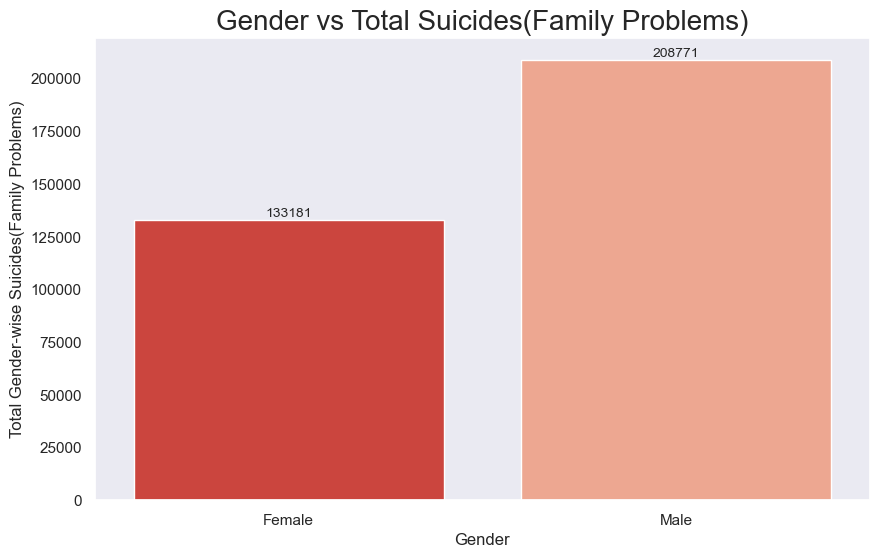

In [77]:
temp = df_causes_fp[['Gender','Total']].groupby(['Gender']).sum()
plt.figure(figsize=(10,6))
plt.title('Gender vs Total Suicides(Family Problems)',fontsize=20)
c1 = sns.barplot(x=temp.index,y=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size = 10)
plt.xlabel('Gender')
plt.ylabel('Total Gender-wise Suicides(Family Problems)')
plt.show()

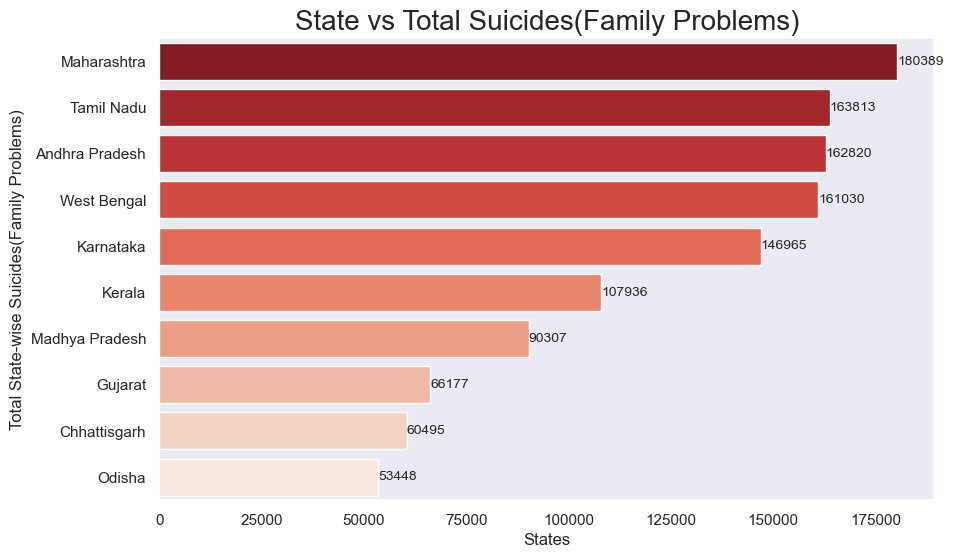

<Figure size 640x480 with 0 Axes>

In [78]:
temp = df_causes[['State','Total']].groupby(['State']).sum().sort_values('Total',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.title('State vs Total Suicides(Family Problems)',fontsize=20)
c1 = sns.barplot(y=temp.index,x=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size = 10)
plt.xlabel('States')
plt.ylabel('Total State-wise Suicides(Family Problems)')
plt.show()
plt.savefig("familyprob_state.png")

### <b>Economic factors:</b>

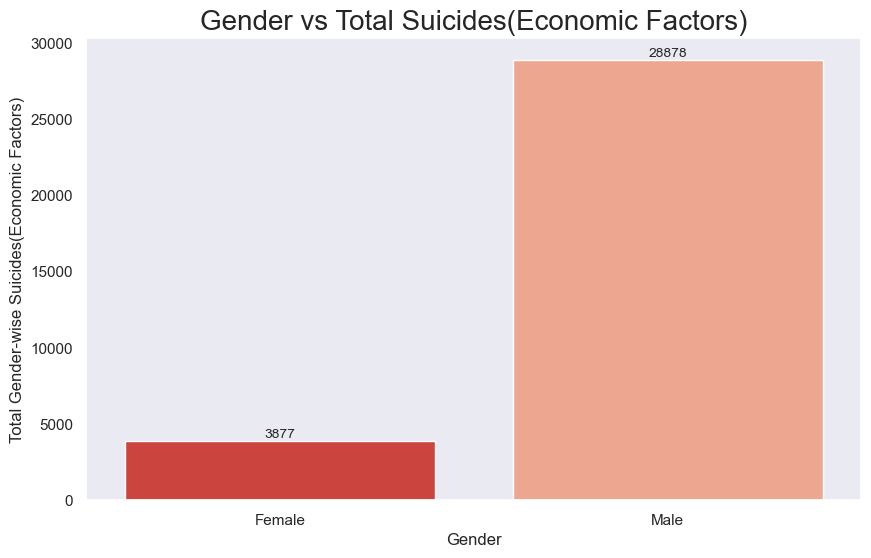

In [79]:
df_causes_bank = df_causes[df_causes.Type=='Bankruptcy or Sudden change in Economic']
temp = df_causes_bank[['Gender','Total']].groupby(['Gender']).sum()
plt.figure(figsize=(10,6))
plt.title('Gender vs Total Suicides(Economic Factors)',fontsize=20)
c1 = sns.barplot(x=temp.index,y=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size = 10)
plt.xlabel('Gender')
plt.ylabel('Total Gender-wise Suicides(Economic Factors)')
plt.show()


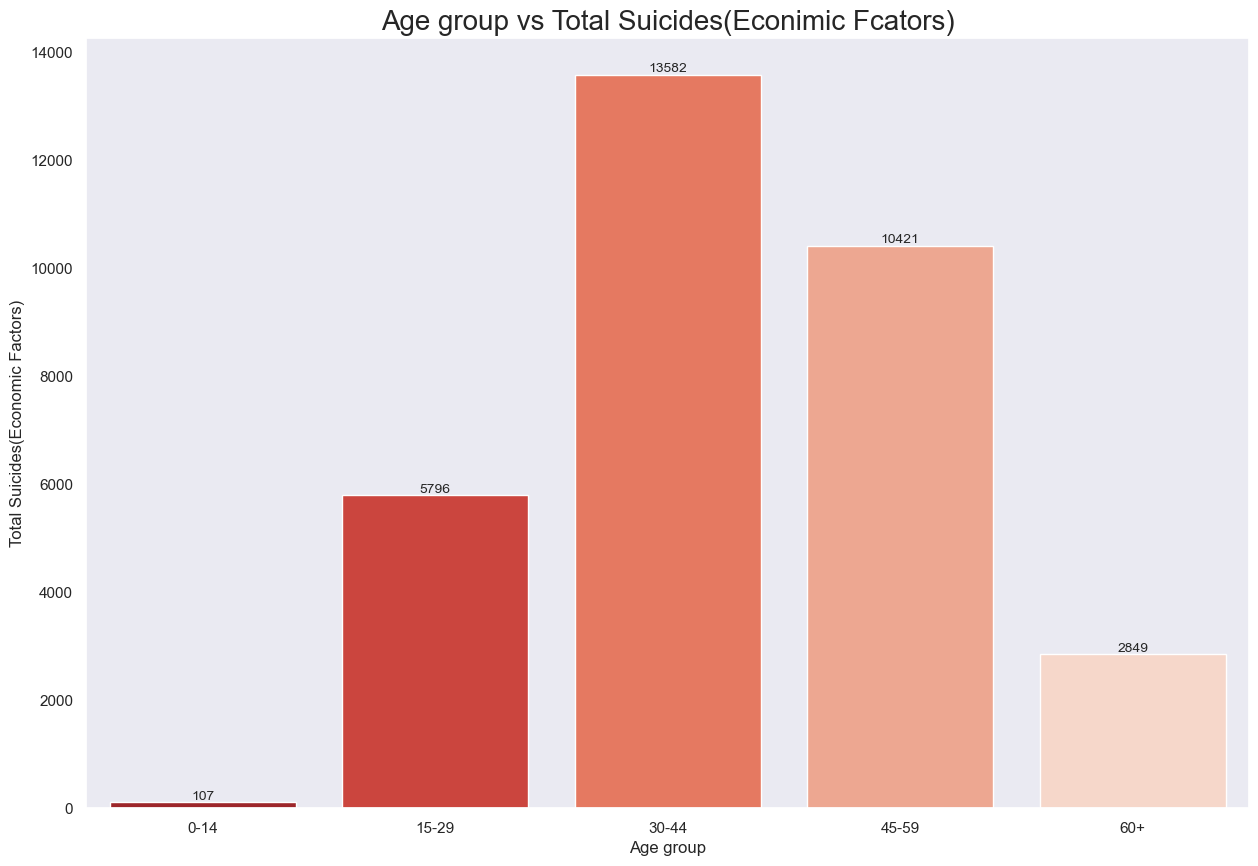

In [80]:
temp = df_causes_bank[['Age_group','Total']].groupby(['Age_group']).sum()
plt.figure(figsize=(15,10))
c1= sns.barplot(x=temp.index,y=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size=10)
plt.title('Age group vs Total Suicides(Econimic Fcators)',fontsize=20)
plt.xlabel('Age group')
plt.ylabel('Total Suicides(Economic Factors)')
plt.show()

### **Profession of the People who committed suicide:**

In [81]:
df_social = df[df.Type_code=='Professional_Profile']

C:\Users\aksha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


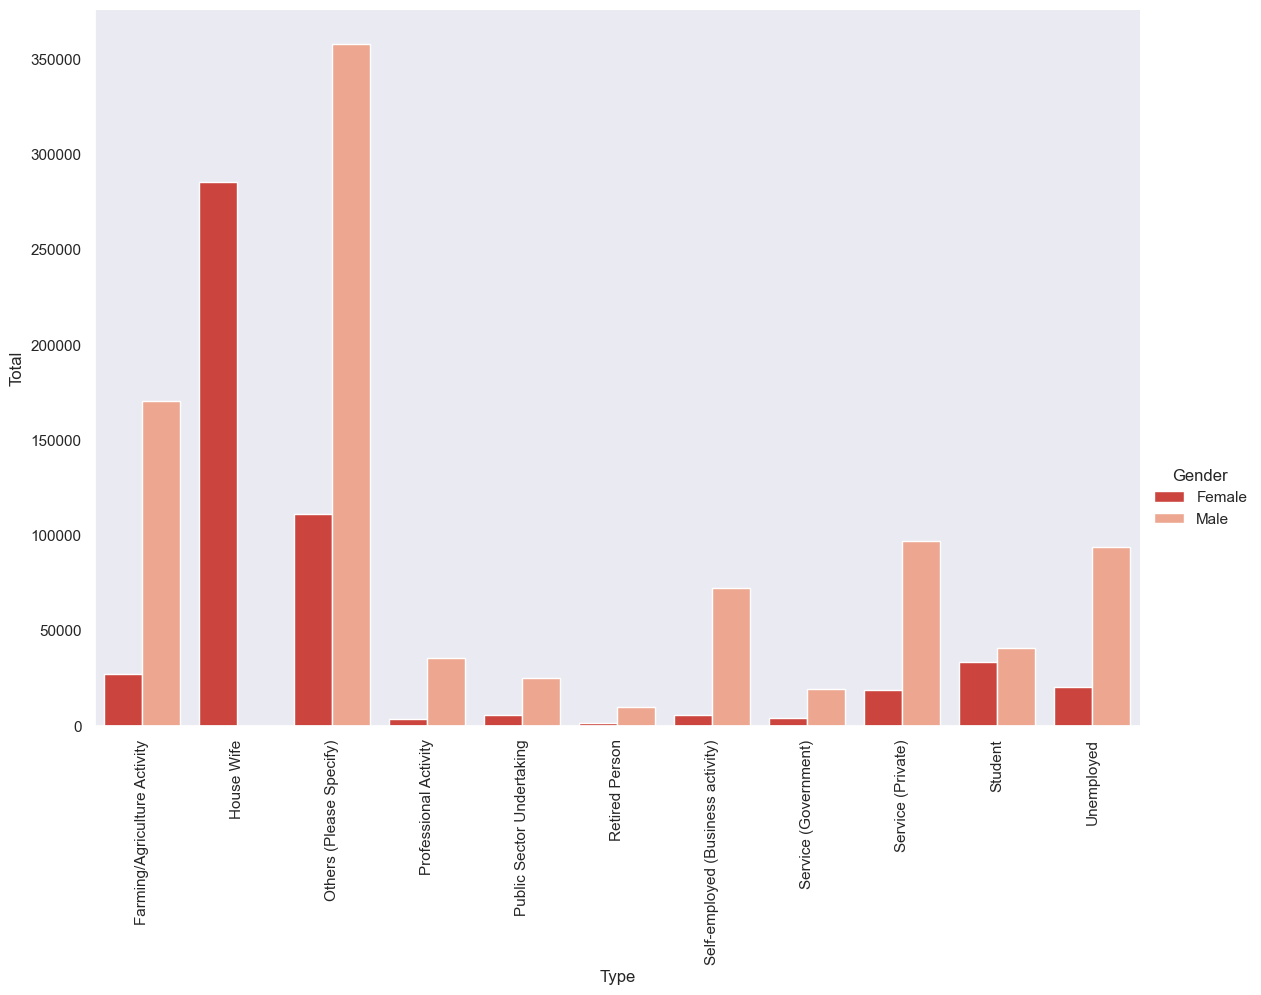

In [82]:
filter_social_status = pd.DataFrame(df[df["Type_code"]=="Professional_Profile"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar",palette="Reds_r",data=filter_social_status,height=8, aspect=11.7/8)
g.set_xticklabels(rotation=90)
plt.show()


#### <b>Suicides rates of people associated with farming:</b>

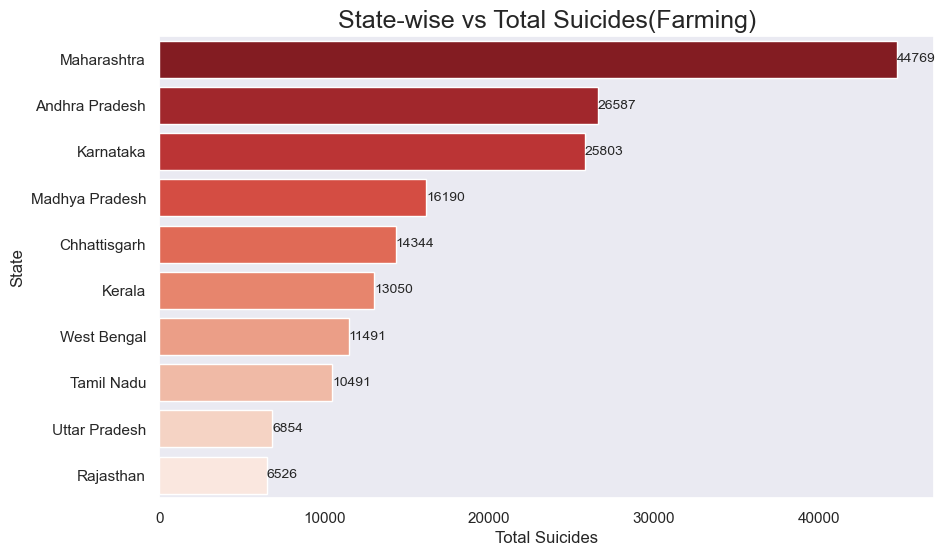

In [83]:
df_farmers = df_social[df_social.Type=='Farming/Agriculture Activity']
temp = df_farmers[['State','Total']].groupby(['State']).sum().sort_values('Total',ascending=False).head(10)
plt.figure(figsize=(10,6))
c1= sns.barplot(y=temp.index,x=temp.Total,palette='Reds_r')
c1.bar_label(c1.containers[0],fontsize=10)
plt.title('State-wise vs Total Suicides(Farming)',fontsize=18)
plt.xlabel('Total Suicides')
plt.ylabel('State')
plt.show()


#### <b>Suicides of Housewives:</b>

In [84]:
df_housewives = df_social[df_social.Type=='House Wife']


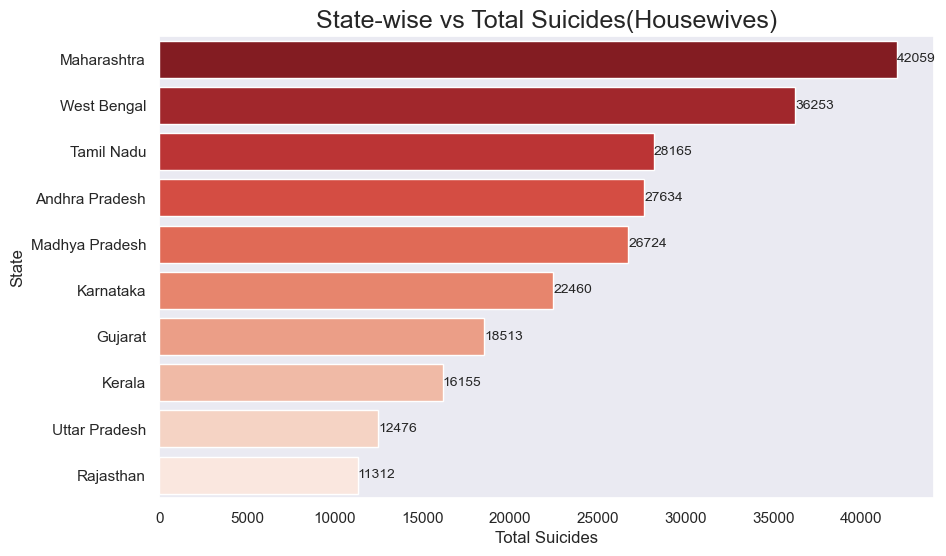

In [85]:
temp = df_housewives[['State','Total']].groupby(['State']).sum().sort_values('Total',ascending=False).head(10)


temp = df_housewives[['State','Total']].groupby(['State']).sum().sort_values('Total',ascending=False).head(10)
plt.figure(figsize=(10,6))
c1= sns.barplot(y=temp.index,x=temp.Total,palette='Reds_r')
c1.bar_label(c1.containers[0],fontsize=10)
plt.title('State-wise vs Total Suicides(Housewives)',fontsize=18)
plt.xlabel('Total Suicides')
plt.ylabel('State')
plt.show()


#### <b>Mental illness:</b>

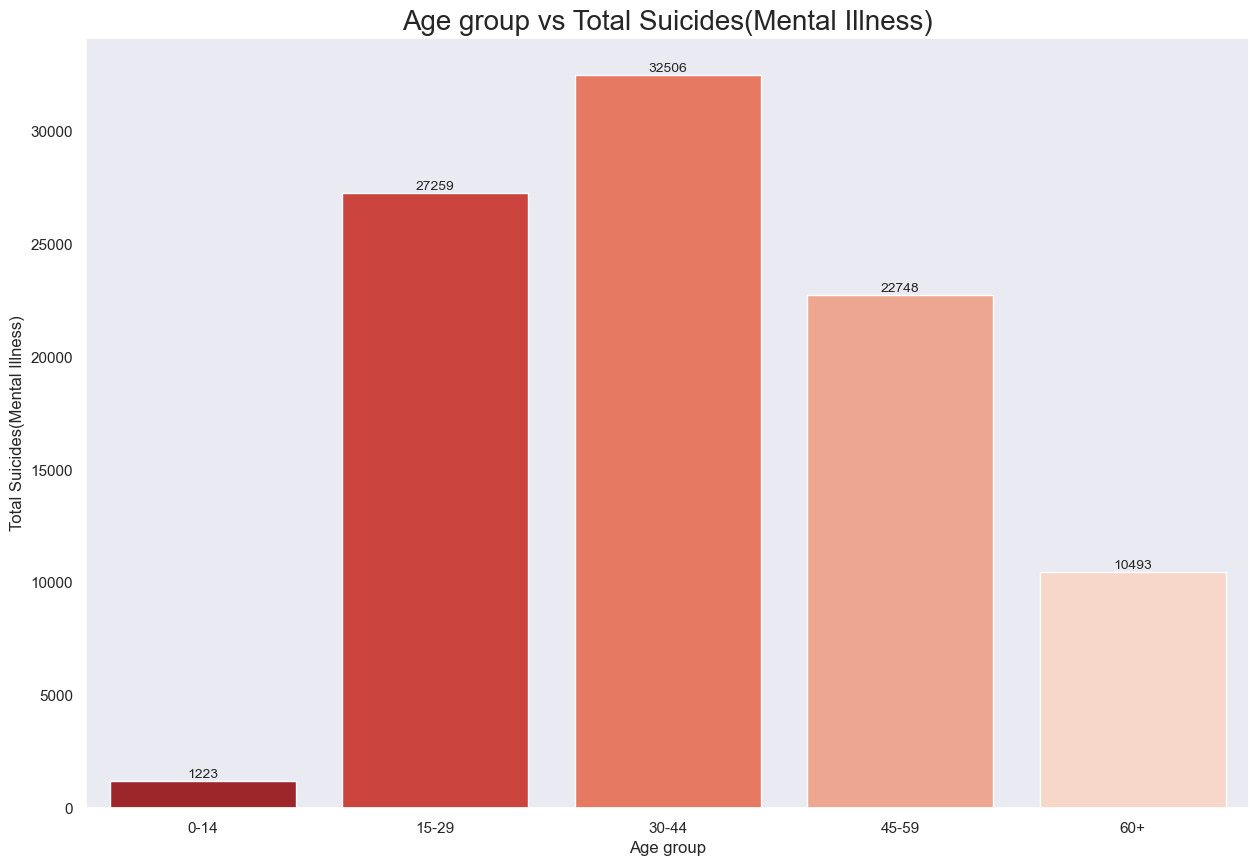

In [86]:
df_causes_mi = df_causes[df_causes.Type=='Insanity/Mental Illness']
df_causes_mi.head()
temp = df_causes_mi[['Age_group','Total']].groupby(['Age_group']).sum()
plt.figure(figsize=(15,10))
c1= sns.barplot(x=temp.index,y=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size=10)
plt.title('Age group vs Total Suicides(Mental Illness)',fontsize=20)
plt.xlabel('Age group')
plt.ylabel('Total Suicides(Mental Illness)')
plt.show()

#### <b>Love Affairs:</b>

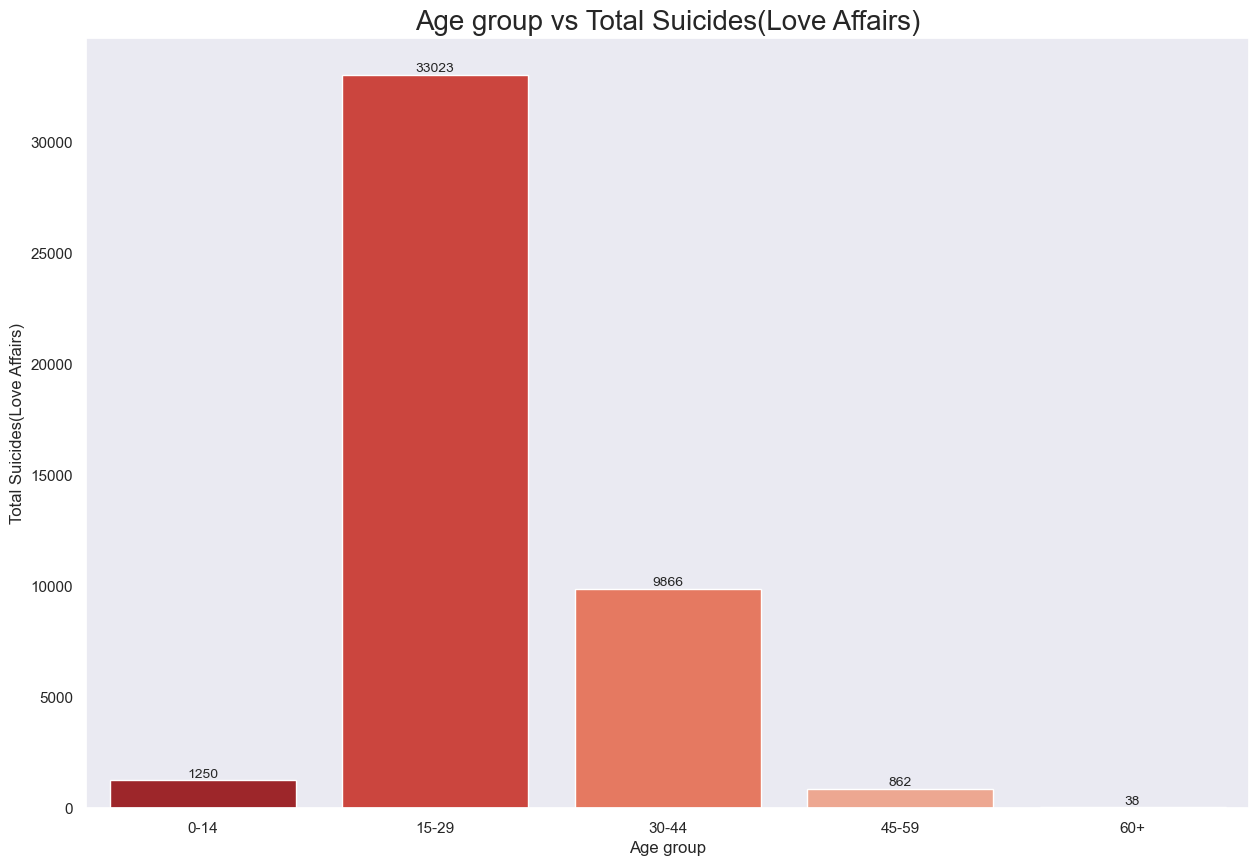

In [87]:
df_causes_la = df_causes[df_causes.Type=='Love Affairs']
df_causes_la.head()
temp = df_causes_la[['Age_group','Total']].groupby(['Age_group']).sum()
plt.figure(figsize=(15,10))
c1= sns.barplot(x=temp.index,y=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size=10)
plt.title('Age group vs Total Suicides(Love Affairs)',fontsize=20)
plt.xlabel('Age group')
plt.ylabel('Total Suicides(Love Affairs)')
plt.show()


<b>Inference:</b>
- People in the **age group of 15-29** tend to take rash decision of suiciding way more than the people beloning to other age groups

### <b>Education Status of People who have committed suicide:</b>

C:\Users\aksha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


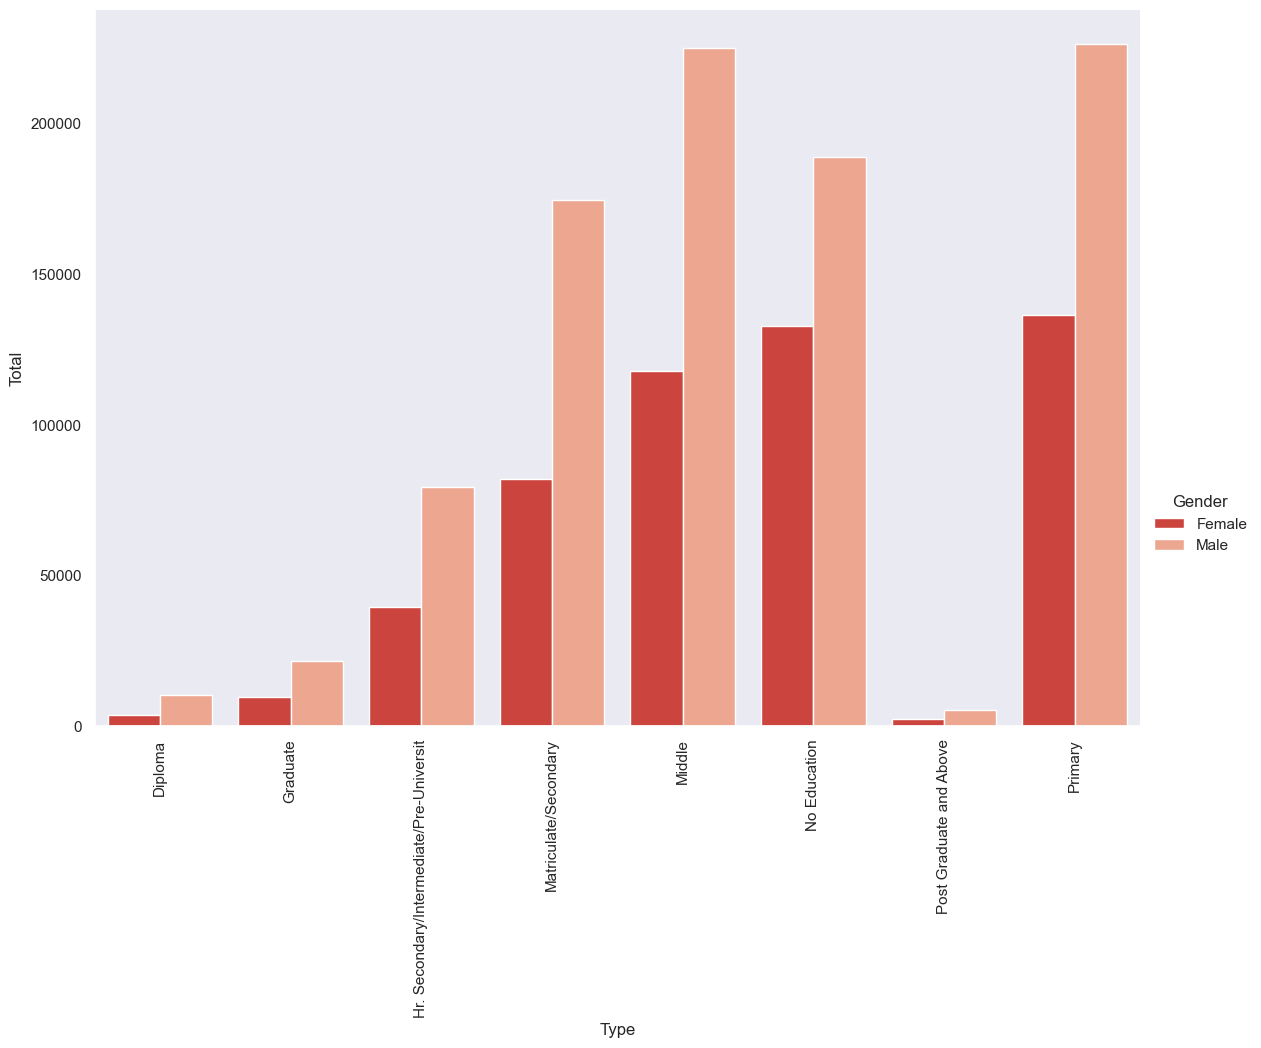

<Figure size 640x480 with 0 Axes>

In [88]:
filter_social_status = pd.DataFrame(df[df["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar",palette="Reds_r",data=filter_social_status,height=8, aspect=11.7/8)
g.set_xticklabels(rotation=90)
plt.show()


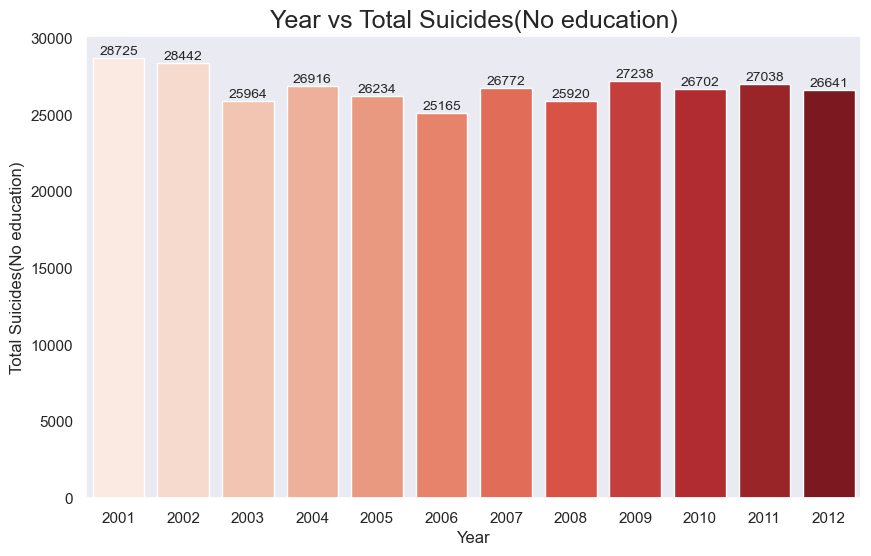

<Figure size 640x480 with 0 Axes>

In [89]:
df_edu = df[df.Type_code=='Education_Status']
df_noedu = df_edu[df_edu.Type=='No Education']
temp = df_noedu[['Year','Total']].groupby(['Year']).sum()
plt.figure(figsize=(10,6))
c1 = sns.barplot(x=temp.index,y=temp.Total,palette="Reds")
c1.bar_label(c1.containers[0],size=10)
plt.title('Year vs Total Suicides(No education)',fontsize=18)
plt.xlabel('Year')
plt.ylabel('Total Suicides(No education)')
plt.show()


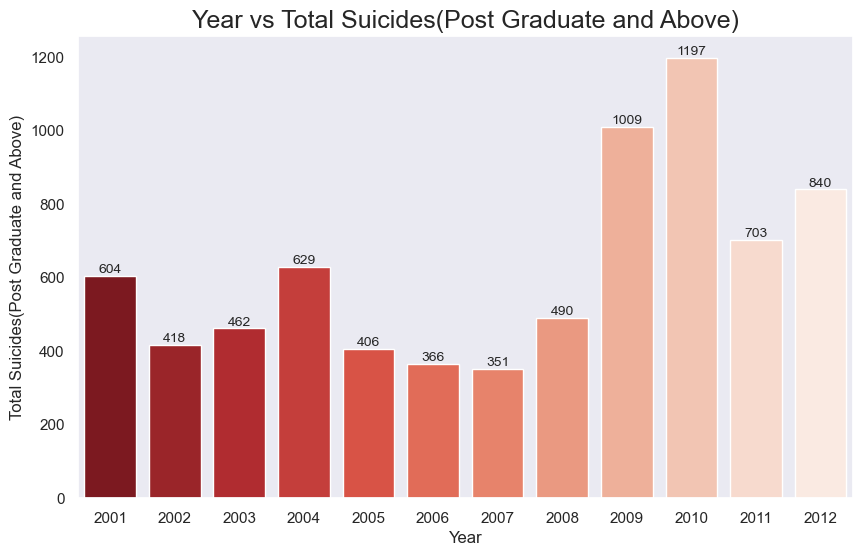

In [90]:
df_edu = df[df.Type_code=='Education_Status']
df_primary = df_edu[df_edu.Type=='Post Graduate and Above']
temp = df_primary[['Year','Total']].groupby(['Year']).sum()
plt.figure(figsize=(10,6))
c1=sns.barplot(x=temp.index,y=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size=10)
plt.title('Year vs Total Suicides(Post Graduate and Above)',fontsize=18)
plt.xlabel('Year')
plt.ylabel('Total Suicides(Post Graduate and Above)')
plt.show()

### <b>Means adopted to suicide:</b>

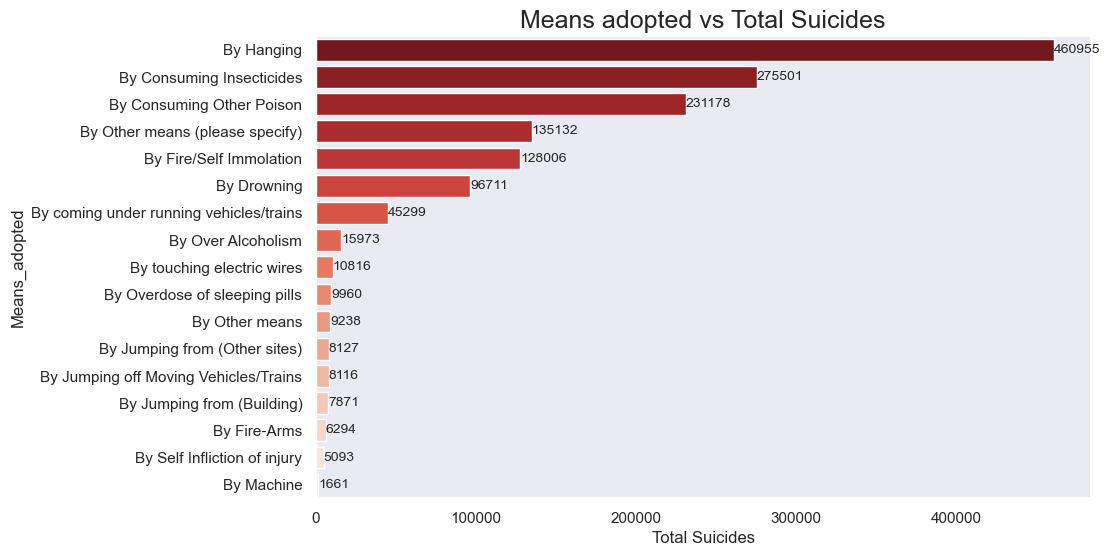

In [91]:
df_means = df[df.Type_code=='Means_adopted']
plt.figure(figsize=(10,6))
temp = df_means[['Type','Total']].groupby(['Type']).sum().sort_values('Total',ascending=False)
c1=sns.barplot(y=temp.index,x=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],fontsize=10)
plt.title('Means adopted vs Total Suicides',fontsize=18)
plt.ylabel('Means_adopted')
plt.xlabel('Total Suicides')
plt.show()

#### <b>By hanging:</b>

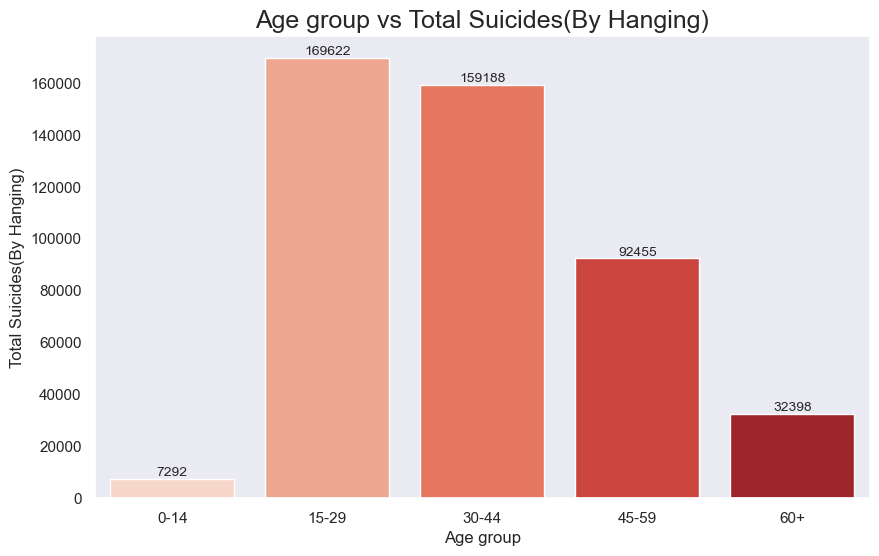

In [92]:
df_means_hang = df_means[df_means.Type=='By Hanging']
temp = df_means_hang[['Age_group','Total']].groupby(['Age_group']).sum()
plt.figure(figsize=(10,6))
c1= sns.barplot(x=temp.index,y=temp.Total,palette='Reds')
c1.bar_label(c1.containers[0],fontsize=10)
plt.title('Age group vs Total Suicides(By Hanging)',fontsize=18)
plt.xlabel('Age group')
plt.ylabel('Total Suicides(By Hanging)')
plt.show()

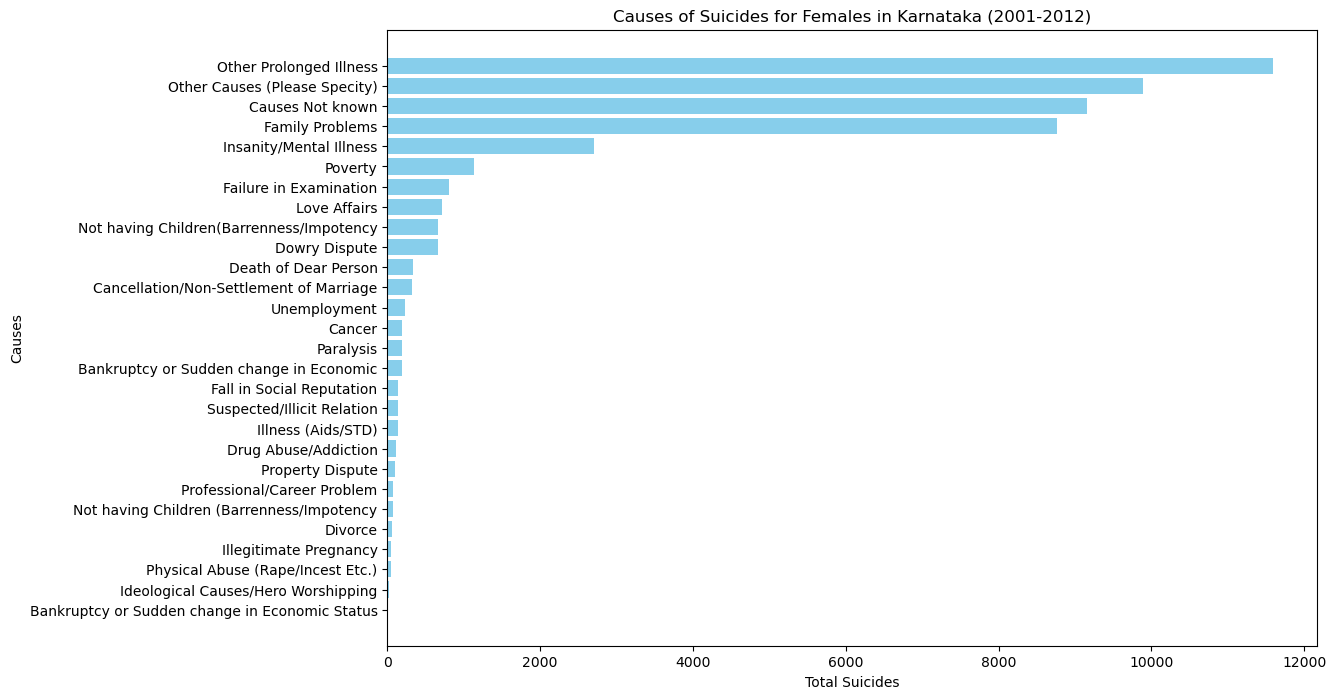

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data= pd.read_csv(r"C:\Users\aksha\OneDrive\Desktop\eda pro\Suicides in India 2001-2012.csv")

# Filter data for Karnataka, females, and causes
filtered_data = data[(data['State'] == 'Karnataka') & 
                     (data['Gender'] == 'Female') & 
                     (data['Type_code'] == 'Causes')]

# Group by cause and sum the total
causes_data = filtered_data.groupby('Type')['Total'].sum().reset_index()


causes_data = causes_data.sort_values(by='Total', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(causes_data['Type'], causes_data['Total'], color='skyblue')
plt.xlabel('Total Suicides')
plt.ylabel('Causes')
plt.title('Causes of Suicides for Females in Karnataka (2001-2012)')
plt.gca().invert_yaxis()  # Highest values on top
plt.show()

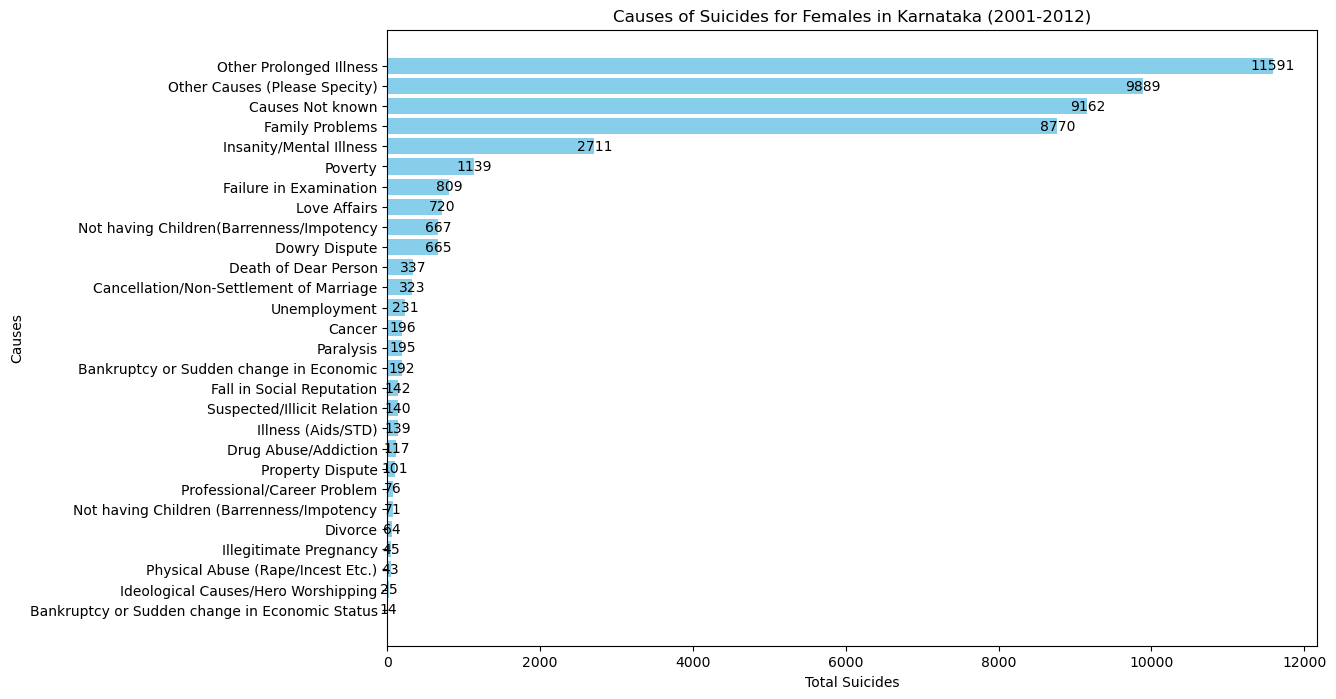

In [5]:
f_data = data[(data['State'] == 'Karnataka') & 
                     (data['Gender'] == 'Female') & 
                     (data['Type_code'] == 'Causes')]
causes_data = f_data.groupby('Type')['Total'].sum().reset_index()
causes_data = causes_data.sort_values(by='Total', ascending=False)
plt.figure(figsize=(12, 8))
bars = plt.barh(causes_data['Type'], causes_data['Total'], color='skyblue')
plt.xlabel('Total Suicides')
plt.ylabel('Causes')
plt.title('Causes of Suicides for Females in Karnataka (2001-2012)')
plt.gca().invert_yaxis()  
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             '%d' % int(width),
             ha='center', va='center')

plt.show()